### Calsificacion de CP para poder un local de tacos tortas

Importar librerias

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.datasets import load_breast_cancer, load_boston

from sklearn.ensemble import (RandomForestClassifier, 
                              GradientBoostingClassifier, 
                              GradientBoostingRegressor)

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ( 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report, 
    roc_auc_score,
    
    mean_squared_error)

from sklearn.model_selection import (
    KFold,
    cross_validate,
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV
)

import os
os.cpu_count()

20

Cargar la informacion

In [151]:
my_file='info_clusterizada.csv'
df=pd.read_csv(my_file)
df.drop(columns=['Unnamed: 0'] , inplace=True)

Hacer la columna taquerias por trabajadores

In [152]:
#godinez por personas
df['taquerias_porPersonas']= np.where(
    df['tacos_tortas']>0,
    (df['trabajadores']/df['tacos_tortas']),
    df['trabajadores']) 

In [153]:
#godinez por taquerias
df['taquerias_porGodin']= np.where(
    df['tacos_tortas']>0,
    (df['godinez']/df['tacos_tortas']),
    df['godinez']) 

Donde yo pondria una taqueria

In [154]:
#aqui pondriamos una taqueria
# cuando exista la combinación de almenos un comercio, un servicio, un consultorio, un taller y un salon y que las taquerias en el lugar atiendan a mas de 50 godinez x taqueria
# esta conbinacion de lugares es de goninezlandia = cluster #3

df['ponerTaqueria']=np.where(    
        (df['comercio']>1) &
        (df['servicios']>1)&
        (df['consultorios']>1) &
        (df['reparacion']>1) &
        (df['salones']>1) &
        (df['taquerias_porGodin']>50),1,0
)

In [155]:
df.set_index("cp", inplace = True)

La variable a calasificar es ponerTaqueria 
1=si, 0 =no

In [156]:
#preparamos los datos
X = df.drop(columns = ['ponerTaqueria','taquerias_porPersonas','taquerias_porGodin'])
y = df['ponerTaqueria']

In [157]:
X

,comercio,servicios,salones,escuelas,reparacion,cafe,trabajadores,farmacias,alquiler,centros,...,montepios,fabricacion,notarias,de_sistemas,godinez,contadores,comida,comida_corrida,tacos_tortas,cluster
cp,,,,,,,,,,,,,,,,,,,,,
121,0,0,0,0,0,0,30,0,0,0,...,0,0,0,0,0,0,1,0,0,0
384,1,0,0,0,0,0,5,0,0,0,...,0,0,0,0,1,0,0,0,0,0
445,0,0,0,0,0,0,5,0,0,0,...,0,0,0,0,1,0,0,0,0,0
465,0,0,0,0,0,0,30,0,0,0,...,0,0,0,0,1,0,0,0,0,0
500,1,0,0,0,0,0,10,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99979,0,0,0,0,0,0,10,0,0,0,...,0,0,0,0,1,0,0,0,0,0
99980,77,7,4,9,3,1,1330,3,1,3,...,0,3,0,0,150,1,12,3,3,0
99990,0,0,0,0,0,0,5,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [158]:
#Partimos los datos
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0)

In [159]:
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val,
                                                test_size=0.3,
                                                random_state=0)

In [160]:
rf=RandomForestClassifier()

In [161]:
param_grid = {
    'n_estimators': range(0, 300,5),     
    'max_depth': range(1, 300,1)
}

In [162]:
rand_rf_search= RandomizedSearchCV(
                                    rf,
                                    param_grid,
                                    scoring='roc_auc',
                                    cv=10,
                                    n_iter=20,
                                    random_state=10,
                                    n_jobs=-1,
                                    refit=True
                                   )   

In [163]:
rand_rf_search.fit(X_train,y_train)

c:\Users\EmmanuelYepiz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\EmmanuelYepiz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\EmmanuelYepiz\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 396, in fit
    self._validate_estimator()
  File "c:\Users\EmmanuelYepiz\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 143, in _validate_estimator
    raise ValueError(
ValueError: n_

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(1, 300),
                                        'n_estimators': range(0, 300, 5)},
                   random_state=10, scoring='roc_auc')

In [164]:
rand_rf_search.best_params_

{'n_estimators': 280, 'max_depth': 57}

In [165]:
y_pred=rand_rf_search.predict(X_val)

In [166]:
print(classification_report(y_val,y_pred))
print('-'*30)
print(roc_auc_score(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4506
           1       1.00      0.74      0.85       546

    accuracy                           0.97      5052
   macro avg       0.98      0.87      0.92      5052
weighted avg       0.97      0.97      0.97      5052

------------------------------
0.8715729454744102


In [131]:
# Respuesta
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, plot_roc_curve

c:\Users\EmmanuelYepiz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


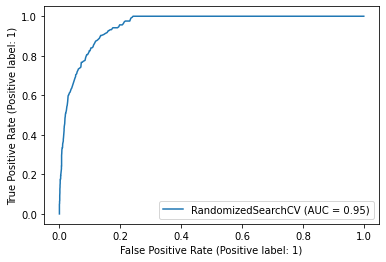

In [111]:
lr_c=plot_roc_curve(rand_rf_search,X_test,y_test)
